In [1]:
import cython
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import pandas as pd

from matplotlib.image import imread

from theano import scan
import theano.tensor as tt

from pymc3.distributions import continuous
from pymc3.distributions import distribution

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-darkgrid')

In [2]:
intercept_0 = 4
beta_0 = [2, 3] # the _0 represents the true parameter, not to be confused with the intercept
sigma_0 = 1.5
n = 100

x1 = np.random.normal(loc=3, scale=2, size=[n, 1])
x2 = np.random.binomial(n=1, p=0.5, size=[n, 1])
assert sum(x2) > 0 and sum(x2) < n

x = np.hstack((x1, x2))
y = intercept_0 + x@np.array(beta_0) + np.random.normal(loc=0, scale=sigma_0, size=[n,])

In [3]:
with pm.Model() as model:
    intercept = pm.Normal("intercept", mu=0, sigma=5)
    
    mean = intercept
    beta = {}
    
    for i in range(x.shape[1]):
        beta[i+1] = pm.Normal(f"beta{i+1}", mu=0, sigma=5)
        mean += beta[i+1]*x[:, i]

    sigma = pm.InverseGamma("sigma", alpha=2, beta=2)
    
    yi = pm.Normal("y", mu=mean, sigma=sigma, observed=y)
    
    trace = pm.sample(draws=2000, chains=3, tune=2000)
    posterior_pred = pm.sample_posterior_predictive(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [sigma, beta2, beta1, intercept]


Sampling 3 chains for 2_000 tune and 2_000 draw iterations (6_000 + 6_000 draws total) took 5 seconds.


/home/larry/anaconda3/envs/pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


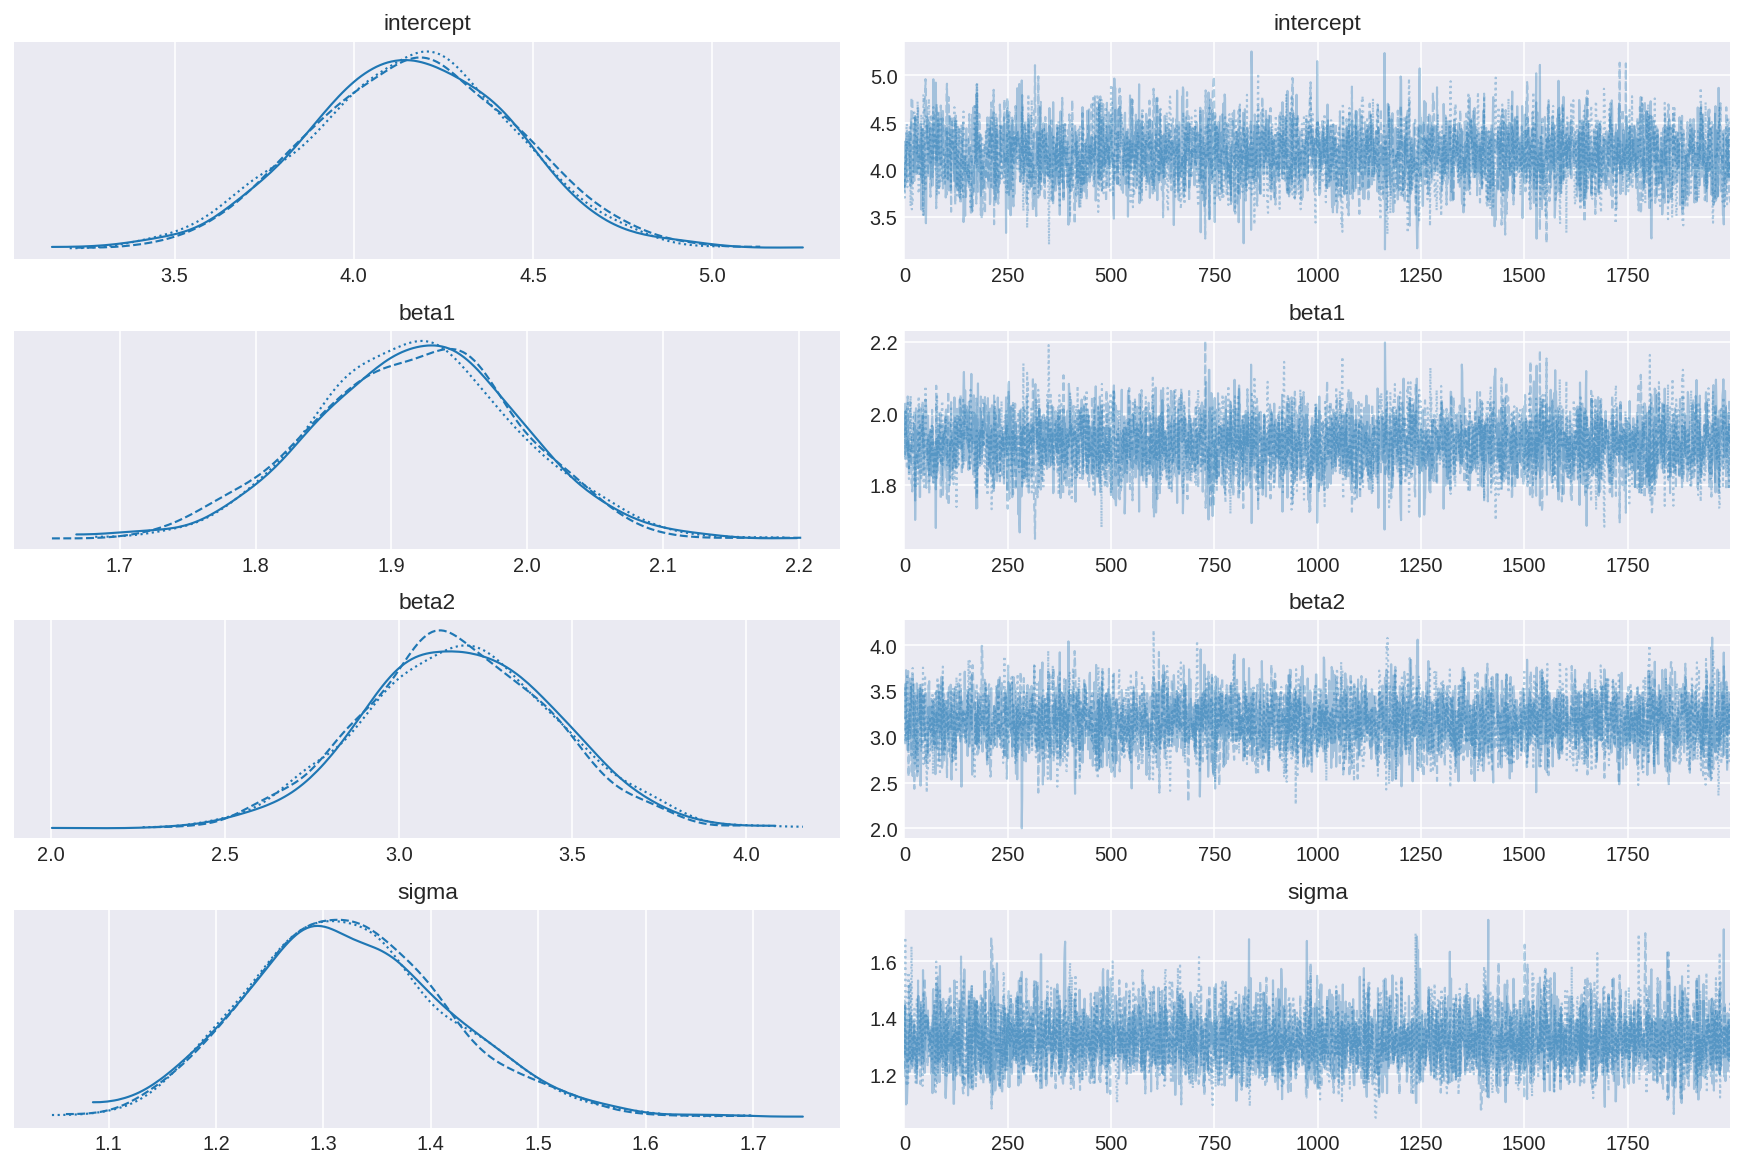

In [4]:
_ = pm.traceplot(trace, var_names=["intercept"] + [f"beta{k}" for k in beta.keys()] + ["sigma"])
plt.show()